Mean Squared Error: 0.6661
R-squared: 0.4871


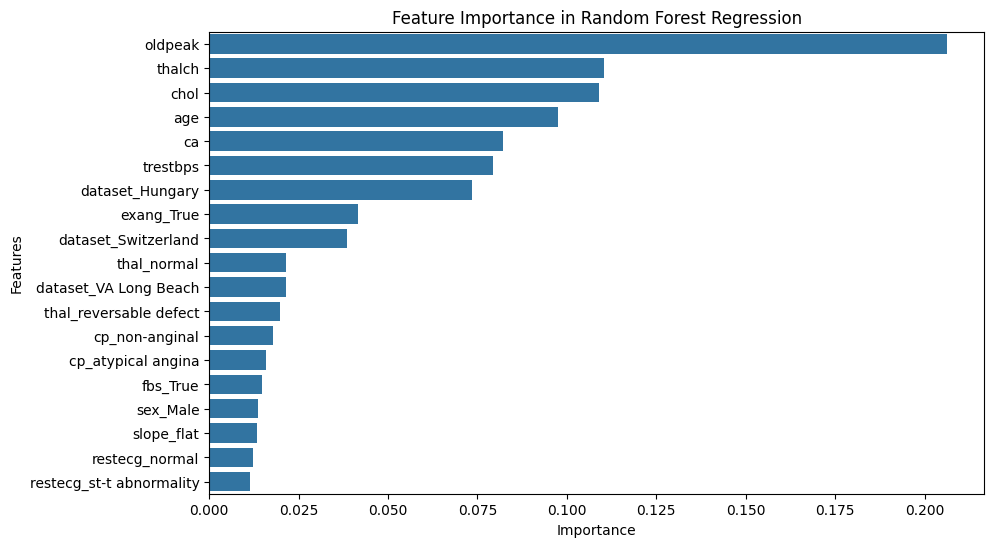

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import r2_score


# Step 1: Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Step 2: Handle missing values (if any)
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

#Step 3: Separate features and target
# 'num' column is assumed to be the target, modify if necessary
# Select features starting from the second column onward
X = df.iloc[:, 1:].drop(columns=['num'])  # Features from second column onward
y = df['num']  # Target variable

# Step 4: Encode categorical variables (if present)
# Identify columns that need encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Use one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded.drop(columns=["cp_typical angina","slope_upsloping"],inplace=True) # Drop the first column of cp as it is redundant after one-hot encoding

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 6: Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 7: Train the Random Forest Regressor
rf_regressor.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 9: Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Step 10: Visualize feature importance
# Extract feature importance from the trained model
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame for feature importance for better visualization
feature_imp_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Feature Importance in Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Accuracy: 0.5870


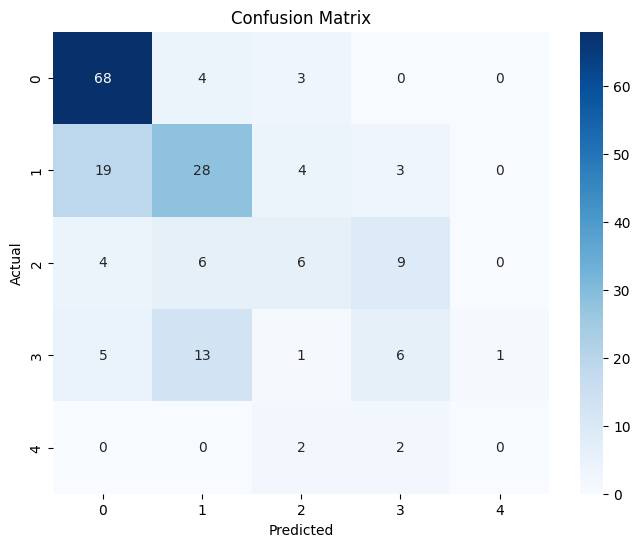

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        75
           1       0.55      0.52      0.53        54
           2       0.38      0.24      0.29        25
           3       0.30      0.23      0.26        26
           4       0.00      0.00      0.00         4

    accuracy                           0.59       184
   macro avg       0.39      0.38      0.38       184
weighted avg       0.54      0.59      0.56       184



In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Step 2: Handle missing values (if any)
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Step 3: Separate features and target
X = df.iloc[:, 1:].drop(columns=['num'])  # Features from second column onward
y = df['num']  # Target variable

# Step 4: Encode categorical variables (if present)
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded.drop(columns=["cp_typical angina","slope_upsloping"],inplace=True)
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 6: Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7: Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 9: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 10: Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 11: Additional evaluation metrics (classification report)
# Setting zero_division=1 to handle undefined precision
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))  # Use zero_division to handle warnings
